# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
from alpaca_trade_api.rest import REST, TimeFrame
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [ ]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
print(json.dumps(btc_data, indent=4))
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

In [ ]:
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
print(json.dumps(eth_data, indent=4))
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

In [8]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $49716.00
The current value of your 5.3 ETH is $15193.72


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [96]:
# Set current amount of shares
my_spy = 50
my_agg = 200

In [10]:
# Set Alpaca API key and secret
alpaca_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
tradeapi = REST(alpaca_key, alpaca_secret_key)

In [95]:
# Get current closing prices for AGG and SPY
def get_company(ticker, start, end, tradeapi):
        return tradeapi.get_bars(
        ticker,
        TimeFrame.Day,
        start,
        end
    ).df

my_df = {
    "SPY":get_company("SPY", "2022-01-01", "2022-03-18", tradeapi),
    "AGG":get_company("AGG", "2022-01-01", "2022-03-18", tradeapi)
}
# Preview DataFrame
full_data = pd.concat(my_df.values(), keys=my_df.keys(), axis="columns")
full_data.tail()

SPY                                     \
                              open    high     low   close     volume   
timestamp                                                               
2022-03-14 04:00:00+00:00  420.975  424.55  415.79  417.00   91930409   
2022-03-15 04:00:00+00:00  419.900  426.84  418.42  426.17  104219651   
2022-03-16 04:00:00+00:00  429.940  435.68  424.80  435.62  138130298   
2022-03-17 04:00:00+00:00  433.700  441.07  433.19  441.07  100157174   
2022-03-18 04:00:00+00:00  438.200  444.86  437.22  444.52  102327793   

                                                      AGG                     \
                          trade_count        vwap    open     high       low   
timestamp                                                                      
2022-03-14 04:00:00+00:00      863515  419.203845  107.78  107.816  107.3600   
2022-03-15 04:00:00+00:00      920659  422.752423  107.83  107.920  107.4300   
2022-03-16 04:00:00+00:00     1344164  431.339744  107.63  107.730  107.0032   
2022-03-17 04:00:00+00:00      784018  437.706981  107.87  108.060  107.7300   
2022-03-18 04:00:00+00:00      790235  441.458916  107.95  108.140  107.9203   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-03-14 04:00:00+00:00  107.36   9492508       34364  107.571987  
2022-03-15 04:00:00+00:00  107.60  13841071       33852  107.622094  
2022-03-16 04:00:00+00:00  107.68  15809171       43366  107.553629  
2022-03-17 04:00:00+00:00  107.86   8005258       24093  107.889900  
2022-03-18 04:00:00+00:00  108.10   7800354       23567  108.060585

In [94]:
# Pick SPY and AGG close prices
closing_prices = pd.DataFrame()
closing_prices["SPY"] = full_data["SPY"]["close"]
closing_prices["AGG"] = full_data["AGG"]["close"]
closing_prices.index = closing_prices.index.date
spy_close_price = closing_prices["SPY"][-1]
agg_close_price = closing_prices["AGG"][-1]

# Print SPY and AGG close prices
print(f"Current SPY closing price: ${spy_close_price}")
print(f"Current AGG closing price: ${agg_close_price}")

Current SPY closing price: $444.52
Current AGG closing price: $108.1


In [93]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22226.00
The current value of your 200 AGG shares is $21620.00


### Savings Health Analysis

In [92]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# Create savings DataFrame
data = [["shares",shares],["crypto",crypto]]
savings_df = pd.DataFrame(data, columns=['asset','current_value'])
savings_df.set_index(savings_df["asset"],inplace=True)
savings_df.drop(columns=["asset"],inplace=True)


# Display savings DataFrame
display(savings_df)

,current_value
asset,
shares,43846.000
crypto,64909.722


array([<AxesSubplot:ylabel='current_value'>], dtype=object)

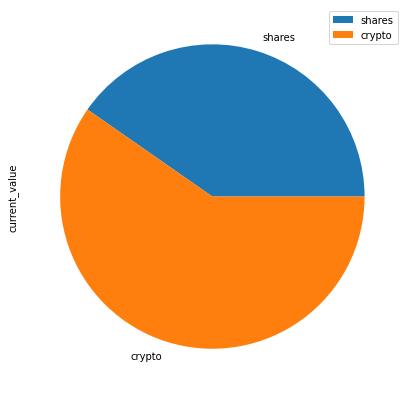

In [44]:
# Plot savings pie chart
savings_df.plot.pie(subplots=True,figsize=(7,7))

In [59]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = savings_df["current_value"].sum()


# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! Your total savings of ${total_savings:0.2f} is enough money in case of an emergency.")
elif total_savings == emergency_fund:
    print(f"Congratulations! You've reached your savings goal of ${emergency_fund:0.2f}")
elif total_savings < emergency_fund:
    print(f"Almost there. You have ${(emergency_fund - total_savings):0.2f} more to save to reach your goal of ${emergency_fund:0.2f}")


Congratulations! Your total savings of $108755.72 is enough money in case of an emergency.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [91]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-03-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-18', tz='America/New_York').isoformat()

In [90]:
# Get 5 years' worth of historical data for SPY and AGG
stock_data_df = {
    "SPY":get_company("SPY", start_date, end_date, tradeapi),
    "AGG":get_company("AGG", start_date, end_date, tradeapi)
}
# Preview DataFrame
full_stock_data = pd.concat(stock_data_df.values(), keys=stock_data_df.keys(), axis="columns")


# Display sample data
full_stock_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-03-20 04:00:00+00:00  237.03  237.36  236.32  236.74   52536979   
2017-03-21 04:00:00+00:00  237.49  237.61  233.58  233.76  131809275   
2017-03-22 04:00:00+00:00  233.78  234.61  233.05  234.25   97569204   
2017-03-23 04:00:00+00:00  234.01  235.34  233.60  233.94  100410277   
2017-03-24 04:00:00+00:00  234.35  235.04  232.96  233.88  112504853   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-03-20 04:00:00+00:00      169612  236.909398  107.86  108.05  107.8401   
2017-03-21 04:00:00+00:00      443599  234.853857  107.93  108.27  107.9300   
2017-03-22 04:00:00+00:00      307469  233.932509  108.44  108.54  108.3600   
2017-03-23 04:00:00+00:00      333903  234.388790  108.44  108.51  108.2635   
2017-03-24 04:00:00+00:00      359600  234.080978  108.35  108.51  108.3100   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-03-20 04:00:00+00:00  108.05  1635249        8198  107.961544  
2017-03-21 04:00:00+00:00  108.27  2049680       12024  108.175725  
2017-03-22 04:00:00+00:00  108.42  2643641       11111  108.455049  
2017-03-23 04:00:00+00:00  108.45  2071485       10901  108.417635  
2017-03-24 04:00:00+00:00  108.36  3374871       11229  108.398485

In [97]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr = MCSimulation(
    portfolio_data=full_stock_data,
    weights= [0.60, 0.40],
    num_simulation= 500,
    num_trading_days= 252 * 30
)

In [98]:
# Printing the simulation input data
MC_30yr.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-03-20 04:00:00+00:00  237.03  237.36  236.32  236.74   52536979   
2017-03-21 04:00:00+00:00  237.49  237.61  233.58  233.76  131809275   
2017-03-22 04:00:00+00:00  233.78  234.61  233.05  234.25   97569204   
2017-03-23 04:00:00+00:00  234.01  235.34  233.60  233.94  100410277   
2017-03-24 04:00:00+00:00  234.35  235.04  232.96  233.88  112504853   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-03-20 04:00:00+00:00      169612  236.909398          NaN  107.86   
2017-03-21 04:00:00+00:00      443599  234.853857    -0.012588  107.93   
2017-03-22 04:00:00+00:00      307469  233.932509     0.002096  108.44   
2017-03-23 04:00:00+00:00      333903  234.388790    -0.001323  108.44   
2017-03-24 04:00:00+00:00      359600  234.080978    -0.000256  108.35   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2017-03-20 04:00:00+00:00  108.05  107.8401  108.05  1635249        8198   
2017-03-21 04:00:00+00:00  108.27  107.9300  108.27  2049680       12024   
2017-03-22 04:00:00+00:00  108.54  108.3600  108.42  2643641       11111   
2017-03-23 04:00:00+00:00  108.51  108.2635  108.45  2071485       10901   
2017-03-24 04:00:00+00:00  108.51  108.3100  108.36  3374871       11229   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-03-20 04:00:00+00:00  107.961544          NaN  
2017-03-21 04:00:00+00:00  108.175725     0.002036  
2017-03-22 04:00:00+00:00  108.455049     0.001385  
2017-03-23 04:00:00+00:00  108.417635     0.000277  
2017-03-24 04:00:00+00:00  108.398485    -0.000830

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr.calc_cumulative_return()

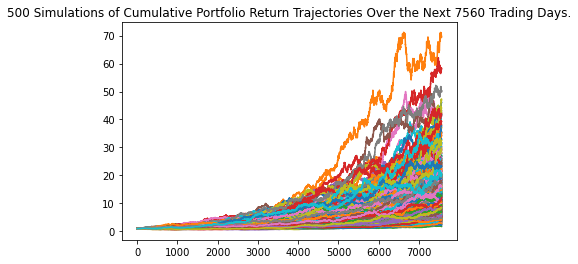

In [101]:
# Plot simulation outcomes
mc_30yr_line_plot = MC_30yr.plot_simulation()

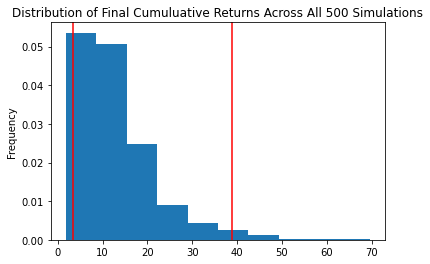

In [102]:
# Plot probability distribution and confidence intervals
mc_30yr_dist_plot = MC_30yr.plot_distribution()

### Retirement Analysis

In [103]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_30yr_tbl = MC_30yr.summarize_cumulative_return()

# Print summary statistics
print(mc_30yr_tbl)

count           500.000000
mean             13.121240
std               9.054484
min               1.773569
25%               6.927422
50%              10.482338
75%              16.923009
max              69.681164
95% CI Lower      3.399949
95% CI Upper     38.779145
Name: 7560, dtype: float64


c:\Users\altma\OneDrive\Documents\FinTechBootCamp\homework\api-financial-planning\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [104]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
mc_30yr_ci_lower = round(mc_30yr_tbl[8]*initial_investment,2)
mc_30yr_ci_upper = round(mc_30yr_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${mc_30yr_ci_lower} and ${mc_30yr_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $67998.98 and $775582.9


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [105]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
mc_30yr_ci_lower = round(mc_30yr_tbl[8]*initial_investment,2)
mc_30yr_ci_upper = round(mc_30yr_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${mc_30yr_ci_lower} and ${mc_30yr_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $101998.47 and $1163374.35


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [106]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr = MCSimulation(
    portfolio_data=full_stock_data,
    weights= [0.60, 0.40],
    num_simulation= 500,
    num_trading_days= 252 * 5
)

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr.calc_cumulative_return()

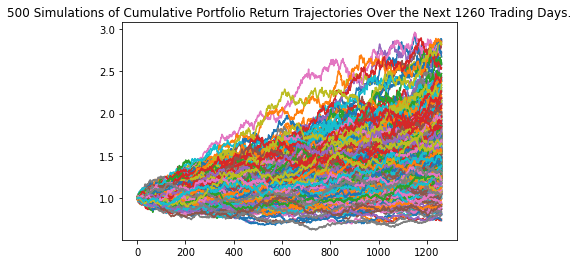

In [108]:
# Plot simulation outcomes
mc_5yr_line_plot = MC_5yr.plot_simulation()

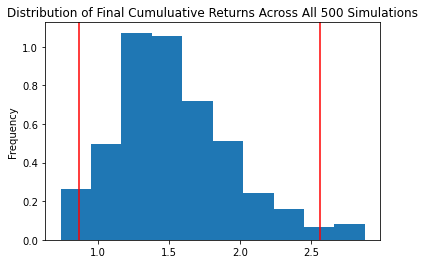

In [109]:
# Plot probability distribution and confidence intervals
mc_5yr_dist_plot = MC_5yr.plot_distribution()

In [110]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_5yr_tbl = MC_5yr.summarize_cumulative_return()

# Print summary statistics
print(mc_5yr_tbl)

count           500.000000
mean              1.537966
std               0.414069
min               0.734010
25%               1.250869
50%               1.477333
75%               1.764580
max               2.877183
95% CI Lower      0.864139
95% CI Upper      2.560562
Name: 1260, dtype: float64


c:\Users\altma\OneDrive\Documents\FinTechBootCamp\homework\api-financial-planning\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [111]:
# Set initial investment
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
mc_5yr_ci_lower = round(mc_5yr_tbl[8]*initial_investment,2)
mc_5yr_ci_upper = round(mc_5yr_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${mc_5yr_ci_lower} and ${mc_5yr_ci_upper}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 5 years will end within in the range of $86413.9 and $256056.2


### Ten Years Retirement Option

In [112]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr = MCSimulation(
    portfolio_data=full_stock_data,
    weights= [0.80, 0.20],
    num_simulation= 500,
    num_trading_days= 252 * 10
)

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr.calc_cumulative_return()

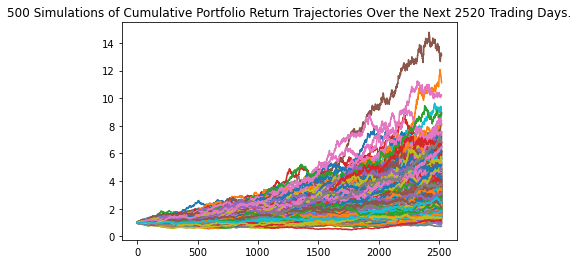

In [115]:
# Plot simulation outcomes
mc_10yr_line_plot = MC_10yr.plot_simulation()

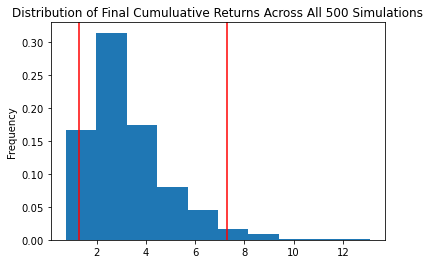

In [116]:
# Plot probability distribution and confidence intervals
mc_10yr_dist_plot = MC_10yr.plot_distribution()

In [117]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_10yr_tbl = MC_10yr.summarize_cumulative_return()

# Print summary statistics
print(mc_10yr_tbl)

count           500.000000
mean              3.264455
std               1.666124
min               0.740657
25%               2.102891
50%               2.843292
75%               3.983782
max              13.109944
95% CI Lower      1.293525
95% CI Upper      7.290119
Name: 2520, dtype: float64


c:\Users\altma\OneDrive\Documents\FinTechBootCamp\homework\api-financial-planning\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [118]:
# Set initial investment
initial_investment = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
mc_10yr_ci_lower = round(mc_10yr_tbl[8]*initial_investment,2)
mc_10yr_ci_upper = round(mc_10yr_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${mc_10yr_ci_lower} and ${mc_10yr_ci_upper}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 10 years will end within in the range of $38805.76 and $218703.56
